In [1]:
#pip install TextBlob

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
consumer_key='W6guY5yu6YWzxmE9Z8OXu6kd6'
consumer_secret='UIlhgwh6MdozTdu7aPY0QDs2D7pA6doQs6l85pWaQCBfvqiAam'
access_token='261613423-x5naOPEAFXtaHDwp1TRmpHbMd87OKNj5xLEYdXMa'
access_token_secret='z8ScGXpMiF2vD9GoSlBWNVS8GAAAdVd4w0J1fqiZG5CcG'

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [6]:
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [7]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.12222222222222223,
 TextBlob("Federal government announces creation of domestic carbon offset system to further support clean growth GHG carbon"))

In [8]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.12222222222222223,
 'Federal government announces creation of domestic carbon offset system to further support clean growth GHG carbon']

In [9]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.122222,Federal government announces creation of domes...
1,0.000000,If they restrict building materials that threa...
2,0.000000,Why declare brantford in a ClimateEmergency an...
3,0.000000,Could this decision be beneficial for climate ...
4,0.064815,The Colombian city is planting giant corridors...


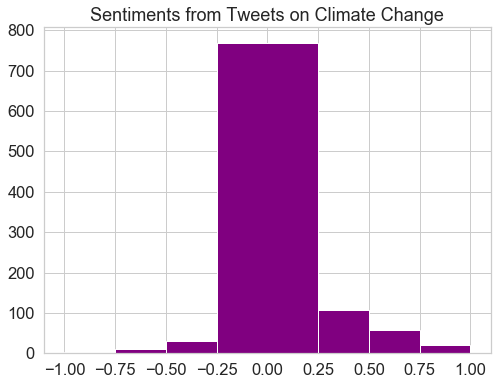

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [11]:
sentiment_df = sentiment_df[sentiment_df.polarity != 0]


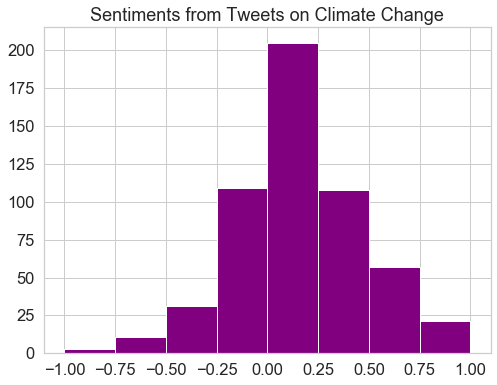

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [13]:
search_term = "#CampFire -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Who doesnt enjoy sitting around a campfire Roasting marshmallows Well lets bring those memories to you"),
 TextBlob("Love this time of year in Hattiesburg campfire smores"),
 TextBlob("Long week cozy firefirepit springcampfire campfire Las Cruces New Mexico"),
 TextBlob("Sept 1980 we dive deep into our subconscious with Phobia with either starsky or hutch"),
 TextBlob("LightnGo1 Id love to try these in a campfire")]

In [14]:
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
0,0.400000,Who doesnt enjoy sitting around a campfire Roa...
1,0.500000,Love this time of year in Hattiesburg campfire...
2,-0.037879,Long week cozy firefirepit springcampfire camp...
4,0.500000,LightnGo1 Id love to try these in a campfire
5,0.400000,Gearing up for the next trip Have a great Frid...


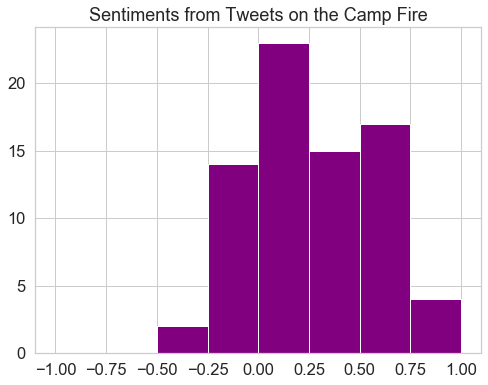

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Camp Fire")
plt.show()